# Figure 7 experiments

With this jupyter notebook, it is possible to replicate the experiments shown in Figure 7 in the appendix of "Typing assumptions improve identification in causal discovery". In a first step, the experiments are performed and in a second step, the results are plotted.

In [1]:
from main import compare_tmec_size
from plot import boxplot
import pandas as pd

## Run experiments

In [30]:
# to perform quick tests, can run with small value for n_graph

# default values
results_folder = "results_appendix"
n_type_list = [10]
n_node_list = [50]
probs_inter_list = [0.2]
probs_intra_list = [0.0]
n_graph = 100

n_nodes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n_types = [2, 5, 10, 15, 20, 30, 40, 50]
p_inters = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

In [4]:
# Fig.7a) number of vertices vary
compare_tmec_size(results_folder,
                  "vertices",
                  n_type_list,
                  n_nodes,
                  probs_inter_list,
                  probs_intra_list,
                  n_graph=n_graph,
                  n_cpu=1)

In [5]:
# Fig.7b) number of types vary
compare_tmec_size(results_folder,
                  "types",
                  n_types,
                  n_node_list,
                  probs_inter_list,
                  probs_intra_list,
                  n_graph=n_graph,
                  n_cpu=1)

In [3]:
# Fig.7c) density vary
compare_tmec_size(results_folder,
                  "density",
                  n_type_list,
                  n_node_list,
                  p_inters,
                  probs_intra_list,
                  n_graph=n_graph,
                  n_cpu=1)

## Plot results

### (a) Size MEC vs t-MEC w.r.t number of vertices

In [22]:
results_path = f"{results_folder}/results_vertices.csv"
r = pd.read_csv(results_path)

mec_size = []
for nodes in n_nodes:
    mec_size.append(r[r["n_nodes"] == nodes]["mec_size"].values)

tmec_size = []
for nodes in n_nodes:
    tmec_size.append(r[r["n_nodes"] == nodes]["tmec_size"].values)

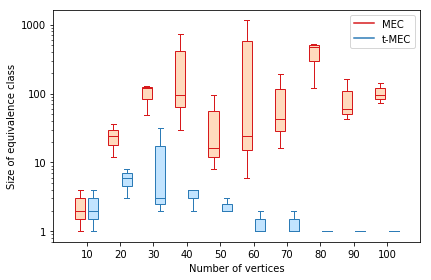

In [23]:
boxplot(ticks=n_nodes,
        path=results_path,
        data_a=mec_size,
        data_b=tmec_size,
        xlabel="Number of vertices",
        image_name="Fig_7a",
        log_scale=True,)

### (b) Size MEC vs t-MEC w.r.t number of types

In [37]:
results_path = f"{results_folder}/results_types.csv"
r = pd.read_csv(results_path)

mec_size = []
for types in n_types:
    mec_size.append(r[r["n_types"] == types]["mec_size"].values)

tmec_size = []
for types in n_types:
    tmec_size.append(r[r["n_types"] == types]["tmec_size"].values)

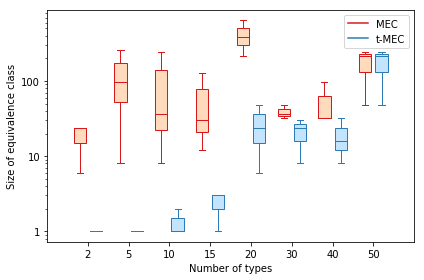

In [27]:
boxplot(ticks=n_types,
        path=results_path,
        data_a=mec_size,
        data_b=tmec_size,
        xlabel="Number of types",
        image_name="Fig_7b",
        log_scale=True,)

### (c) Size MEC vs t-MEC w.r.t density

In [42]:
results_path = f"{results_folder}/results_density.csv"
r = pd.read_csv(results_path)

mec_size = []
for p_inter in p_inters:
    mec_size.append(r[r["prob_inter"] == p_inter]["mec_size"].values)

tmec_size = []
for p_inter in p_inters:
    tmec_size.append(r[r["prob_inter"] == p_inter]["tmec_size"].values)

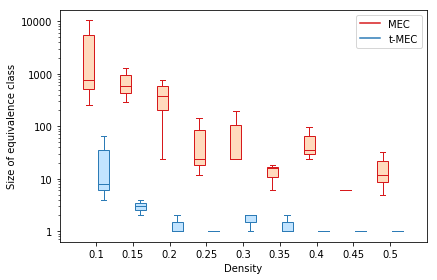

In [43]:
boxplot(ticks=p_inters,
        path=results_path,
        data_a=mec_size,
        data_b=tmec_size,
        xlabel="Density",
        image_name="Fig_7c",
        log_scale=True,)